In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler


In [2]:
os.getcwd()

'c:\\Users\\ardra\\Desktop\\Data-science\\Data_science_study\\Data-science-study\\Project\\Healthcare_Domain\\Parkinson_Disease'

In [3]:
df = pd.read_csv('parkinsons.data')
df.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
pd.pandas.set_option('display.max_columns', None)
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
# Find null values in the datasets
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [9]:
# Finding the uniques value from the dataset

for i in df.columns:
    print("********************************************",i,
         "*************************************************")
    print()
    print(set(df[i].tolist()))
    print()

******************************************** name *************************************************

{'phon_R01_S05_4', 'phon_R01_S06_4', 'phon_R01_S24_1', 'phon_R01_S49_6', 'phon_R01_S16_2', 'phon_R01_S07_1', 'phon_R01_S21_6', 'phon_R01_S26_2', 'phon_R01_S26_5', 'phon_R01_S13_3', 'phon_R01_S32_4', 'phon_R01_S34_5', 'phon_R01_S07_4', 'phon_R01_S06_3', 'phon_R01_S02_5', 'phon_R01_S10_4', 'phon_R01_S50_6', 'phon_R01_S35_5', 'phon_R01_S21_1', 'phon_R01_S39_5', 'phon_R01_S35_7', 'phon_R01_S43_4', 'phon_R01_S24_4', 'phon_R01_S24_2', 'phon_R01_S31_4', 'phon_R01_S43_3', 'phon_R01_S39_2', 'phon_R01_S42_5', 'phon_R01_S35_3', 'phon_R01_S02_3', 'phon_R01_S02_2', 'phon_R01_S26_3', 'phon_R01_S44_3', 'phon_R01_S08_5', 'phon_R01_S18_3', 'phon_R01_S20_1', 'phon_R01_S25_4', 'phon_R01_S50_3', 'phon_R01_S04_6', 'phon_R01_S08_2', 'phon_R01_S20_4', 'phon_R01_S06_6', 'phon_R01_S43_2', 'phon_R01_S26_6', 'phon_R01_S22_5', 'phon_R01_S31_3', 'phon_R01_S31_1', 'phon_R01_S31_6', 'phon_R01_S04_2', 'phon_R01_S39_4'

AxesSubplot(0.125,0.11;0.775x0.77)


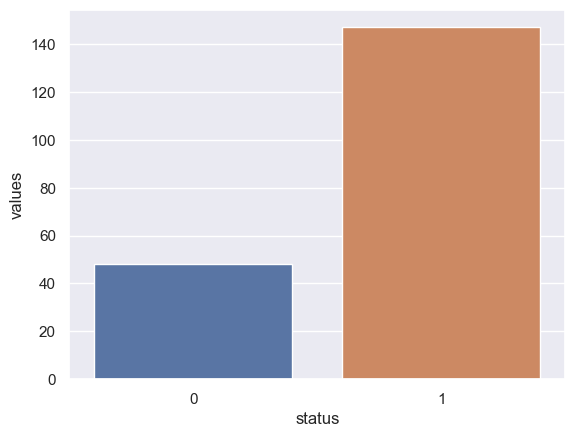

In [10]:
temp= df['status'].value_counts()
temp_df= pd.DataFrame({'status': temp.index, 'values':temp.values})
print(sns.barplot(x='status', y='values', data= temp_df))

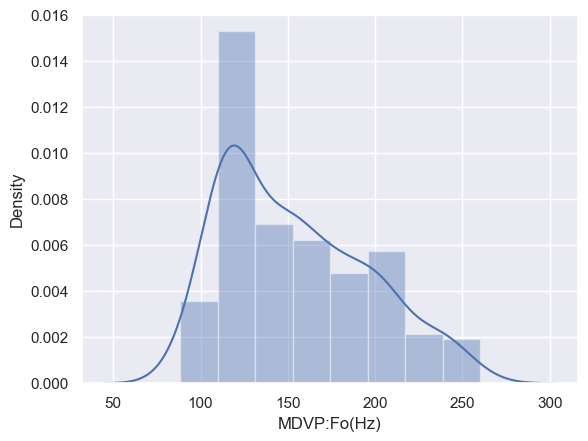

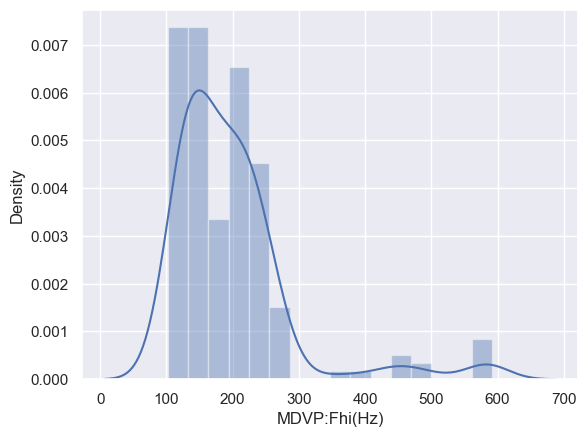

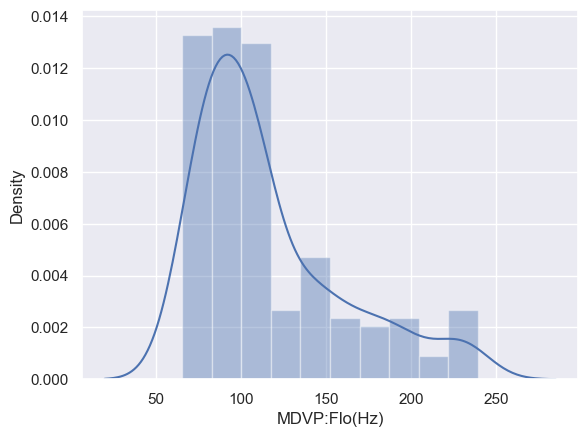

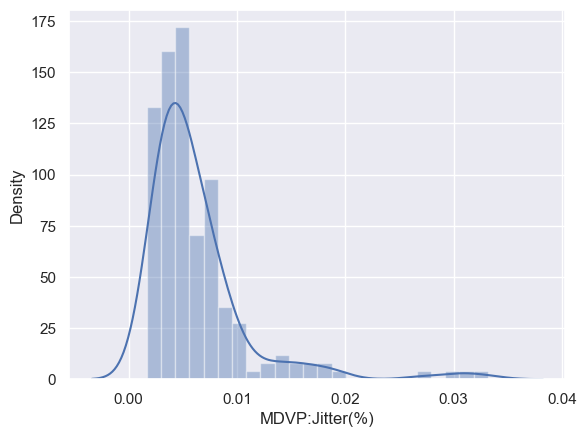

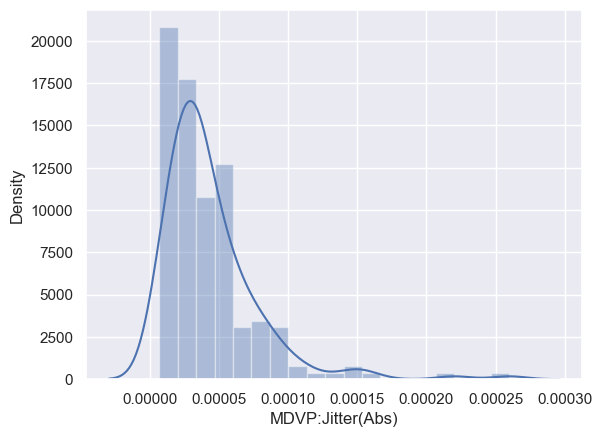

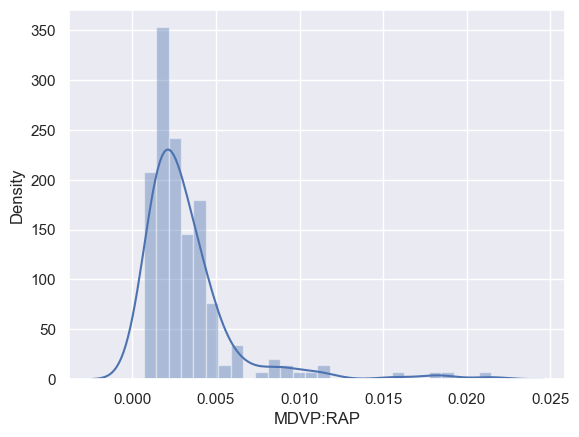

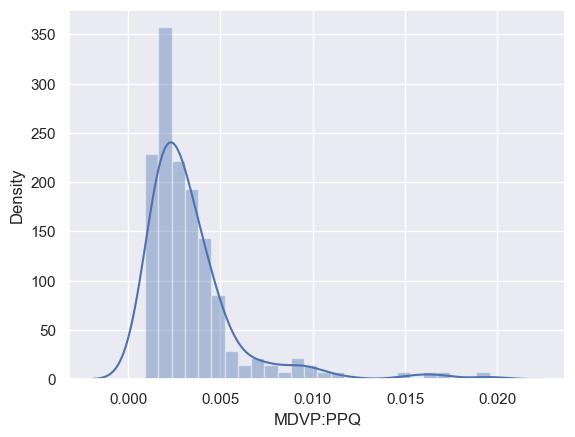

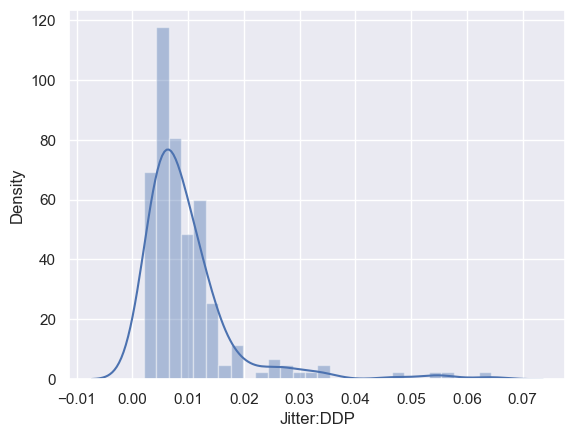

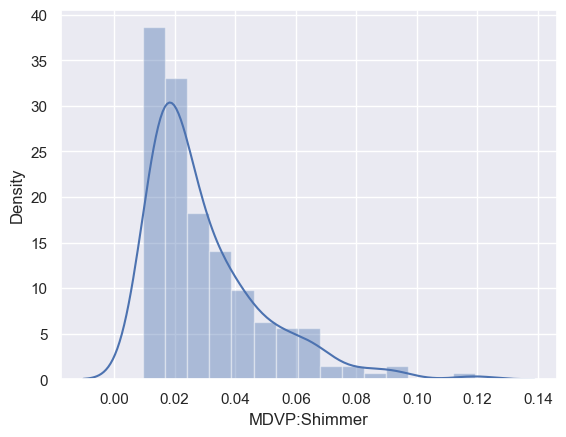

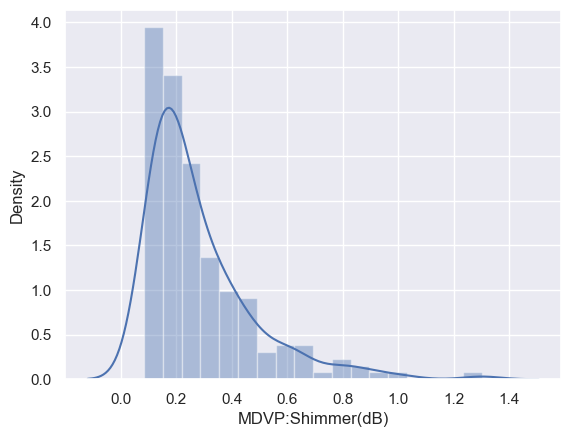

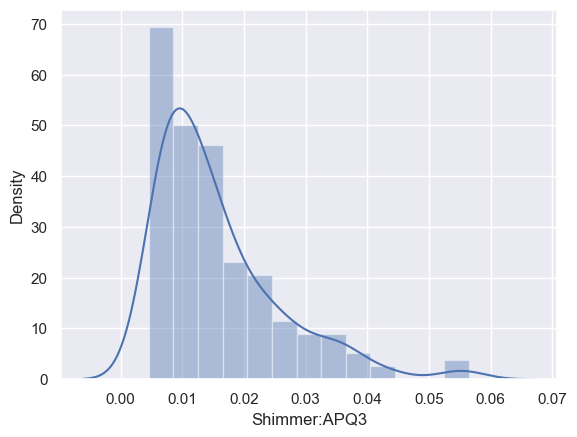

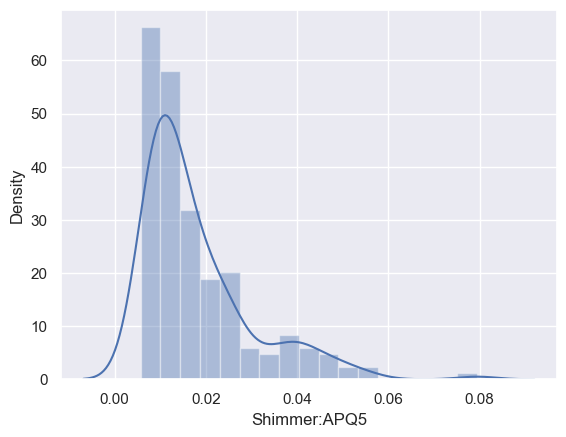

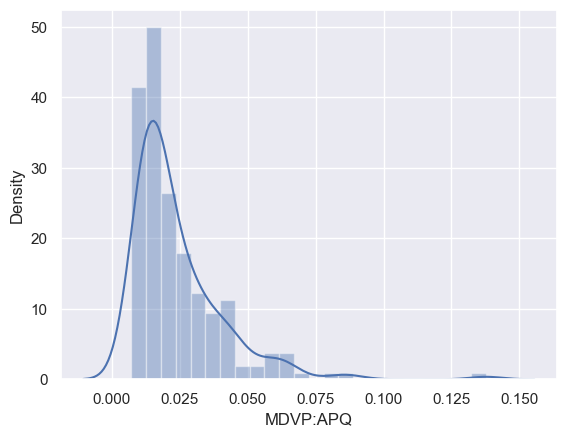

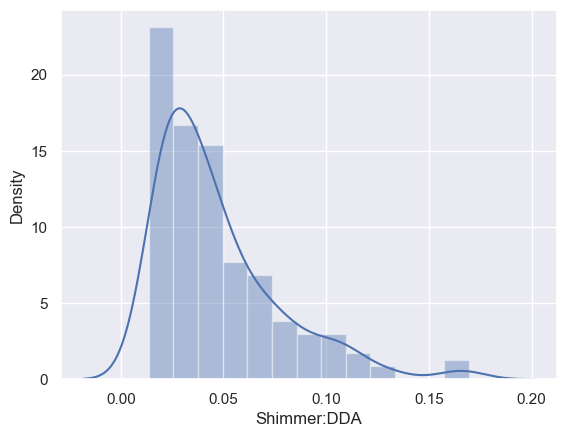

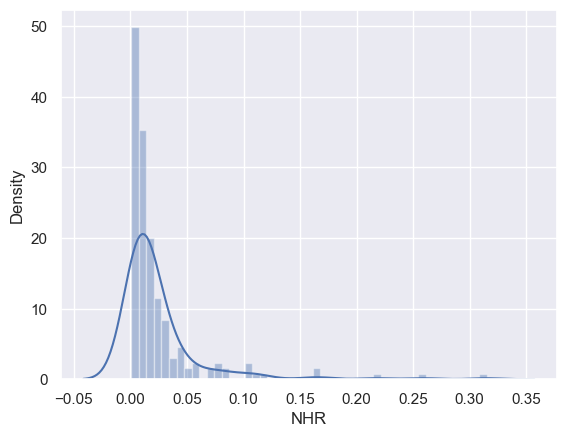

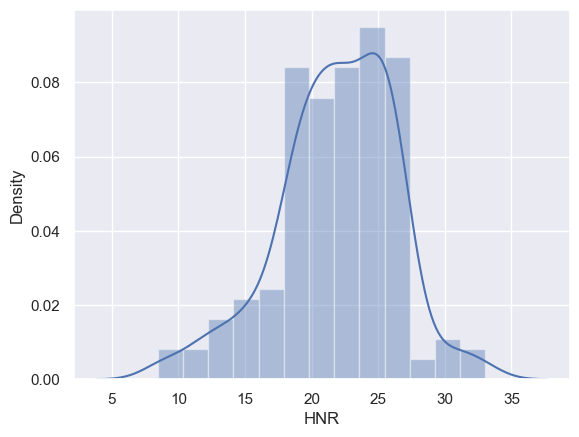

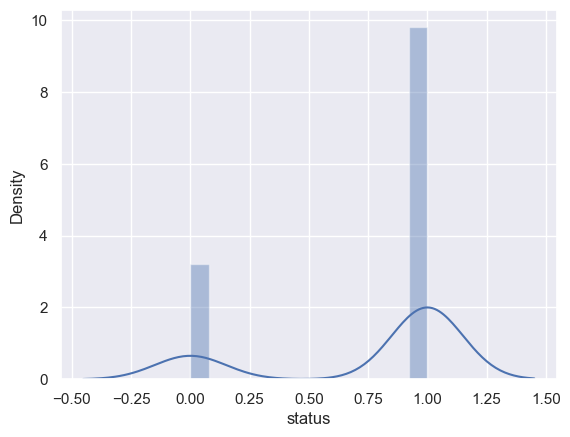

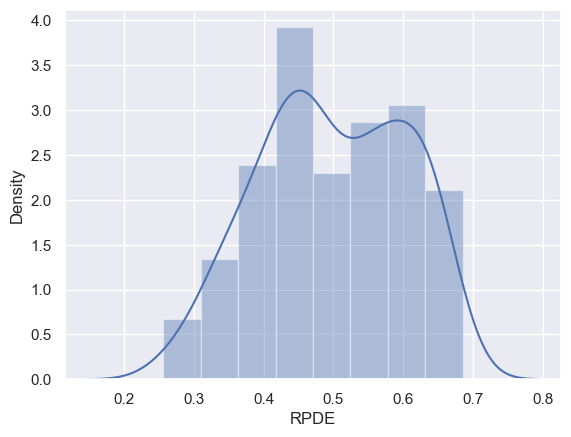

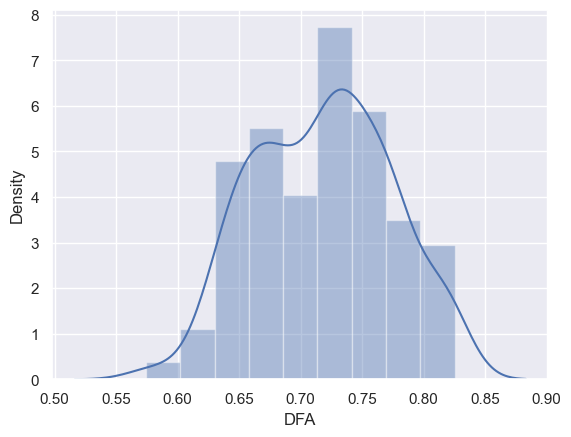

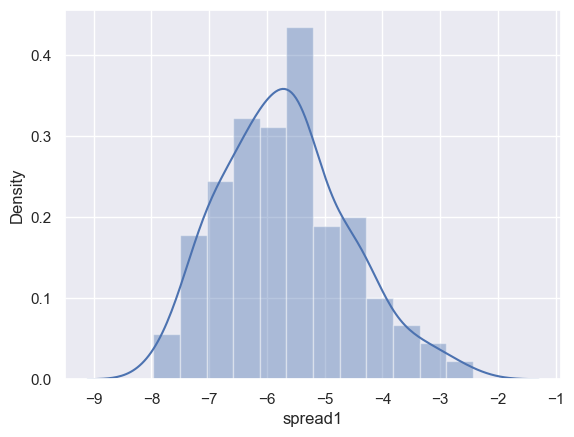

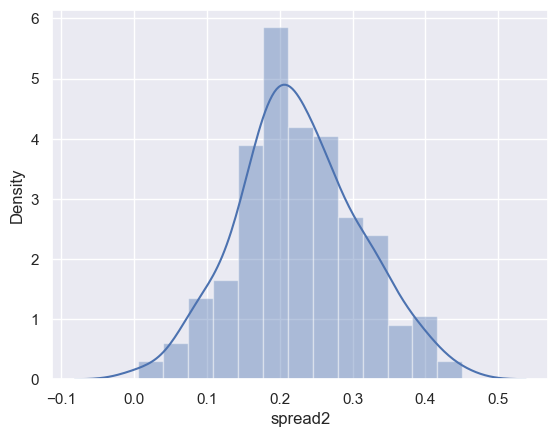

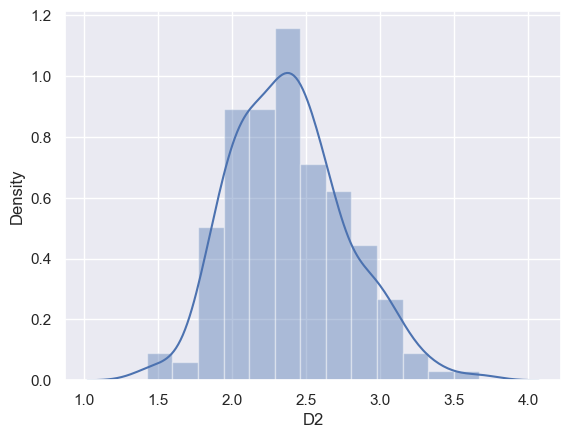

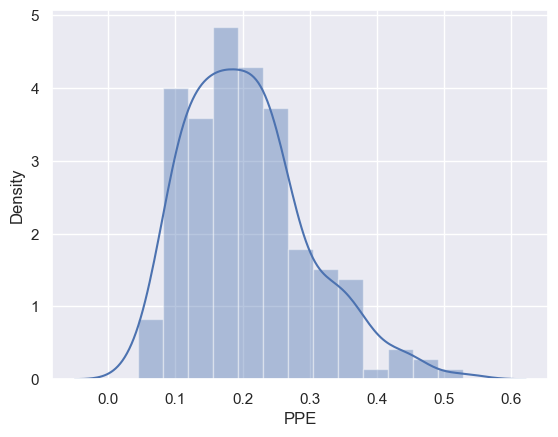

In [11]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

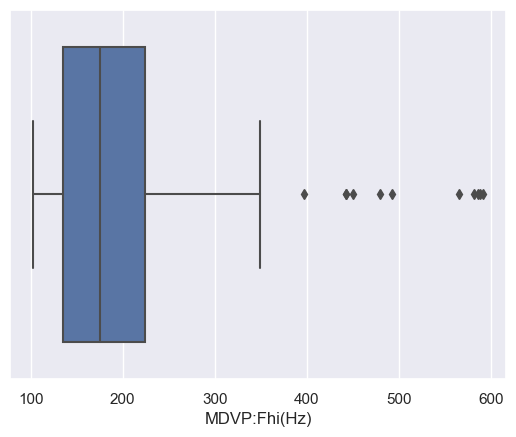

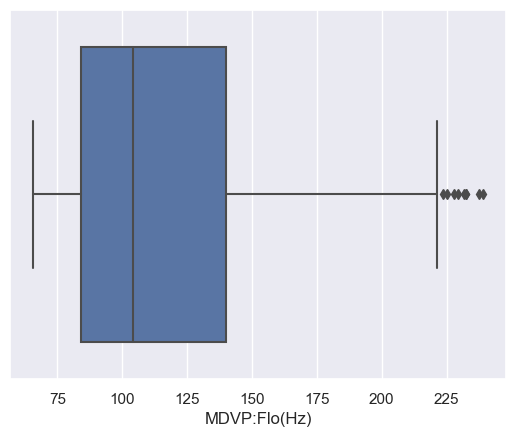

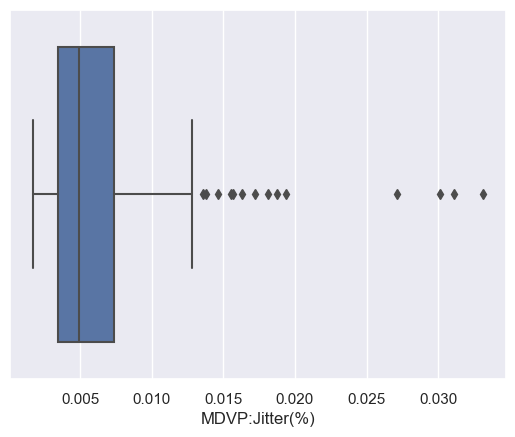

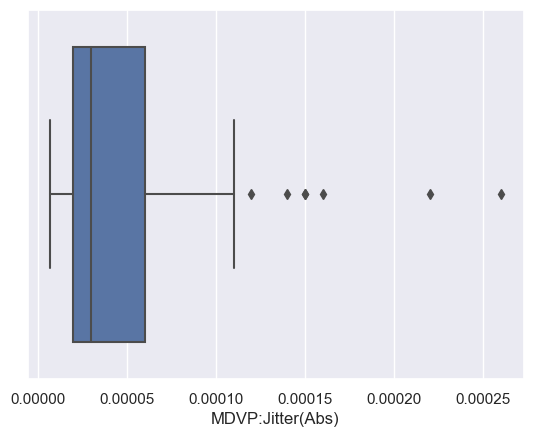

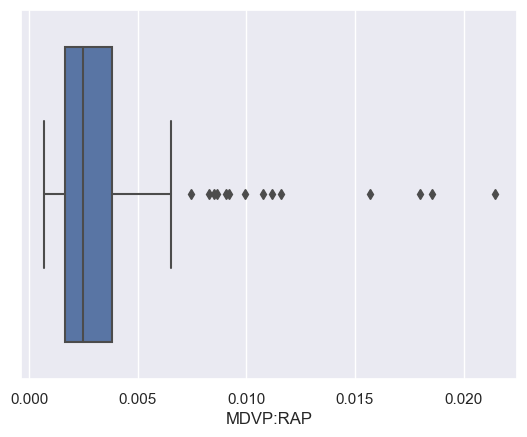

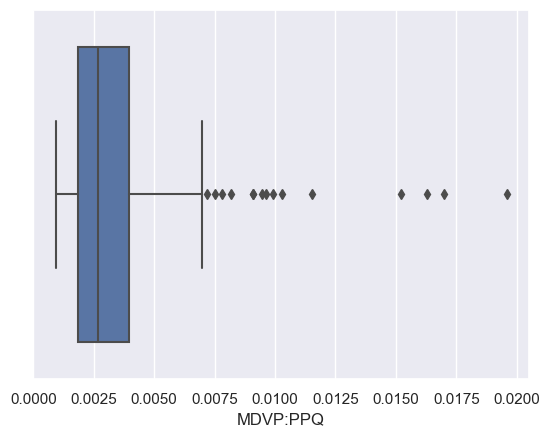

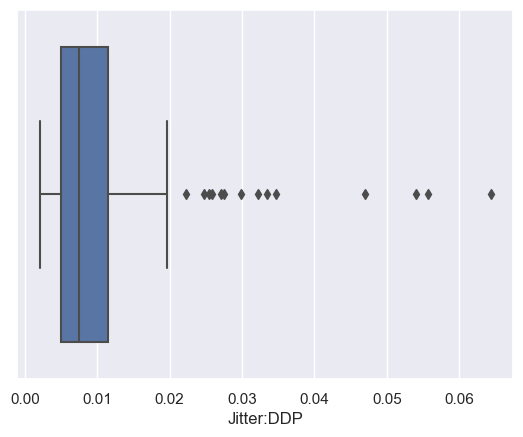

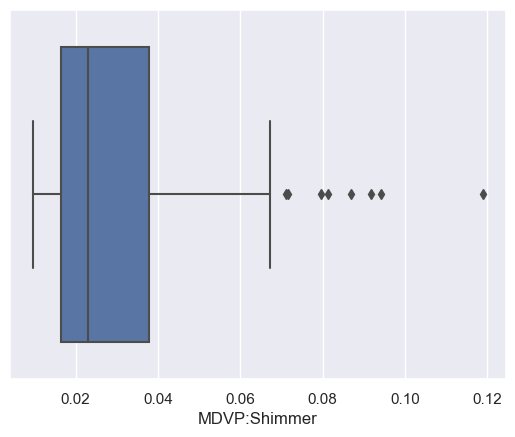

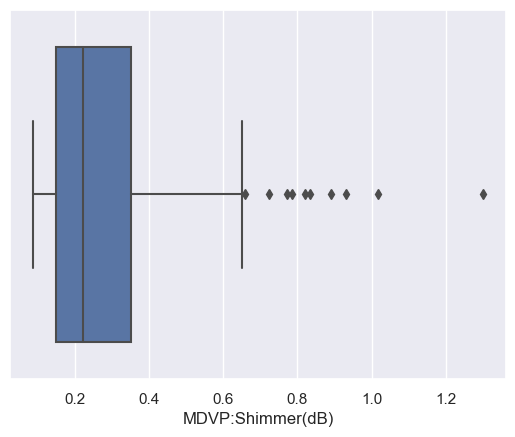

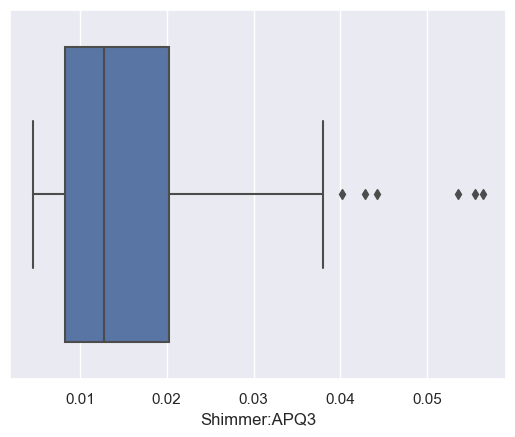

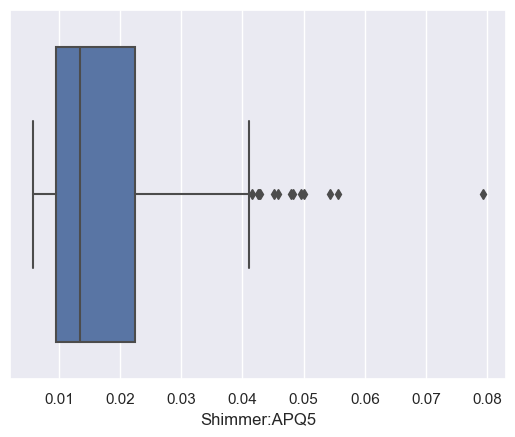

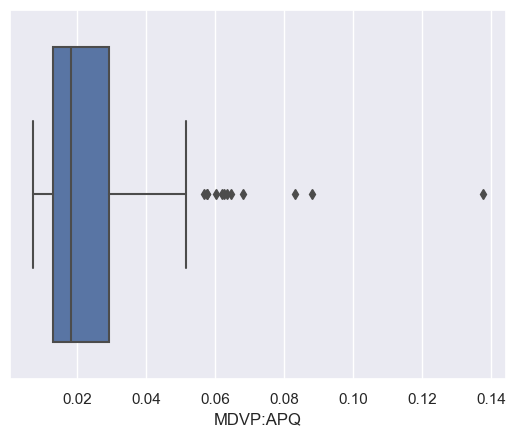

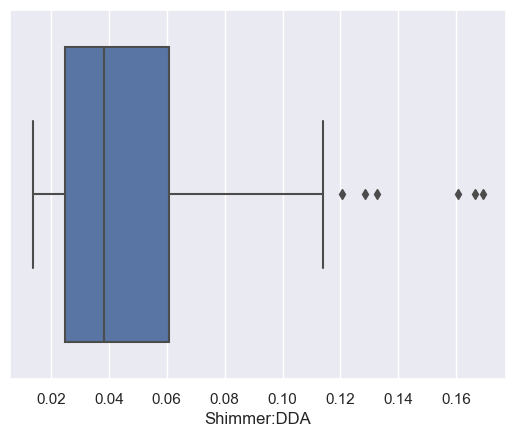

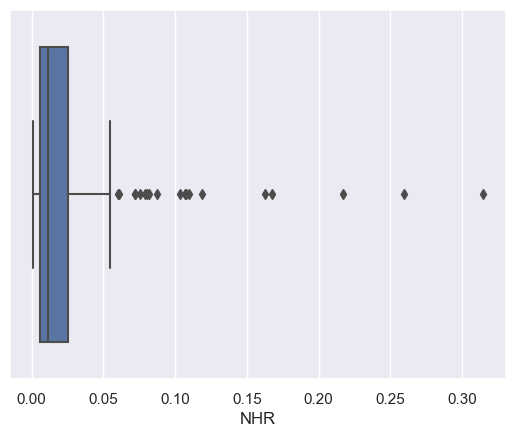

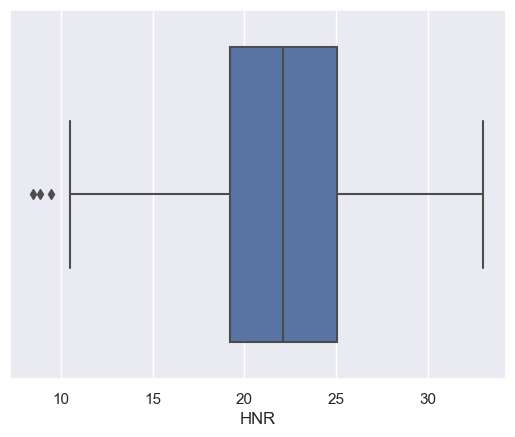

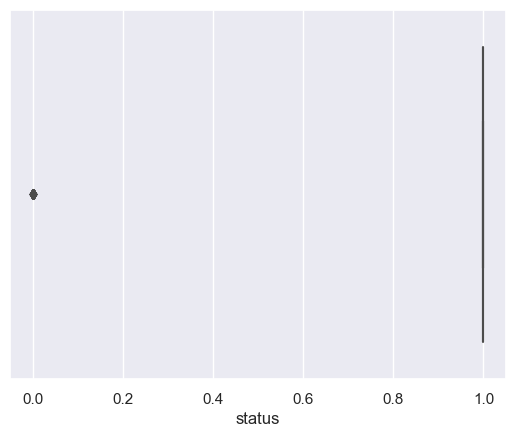

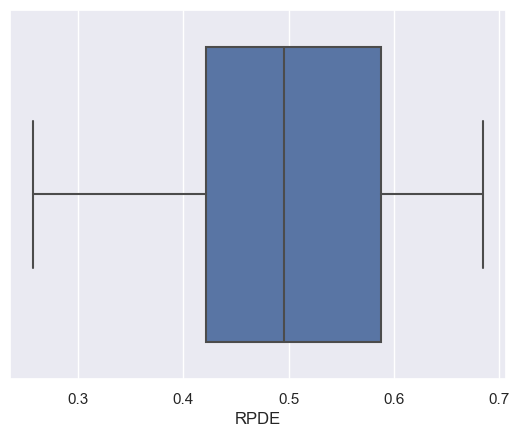

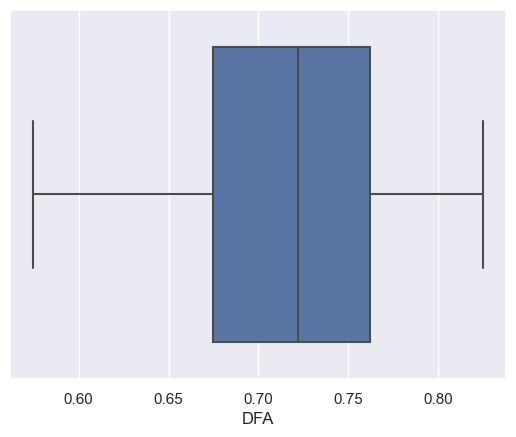

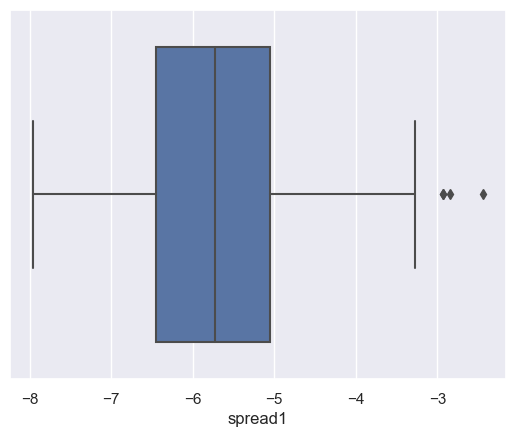

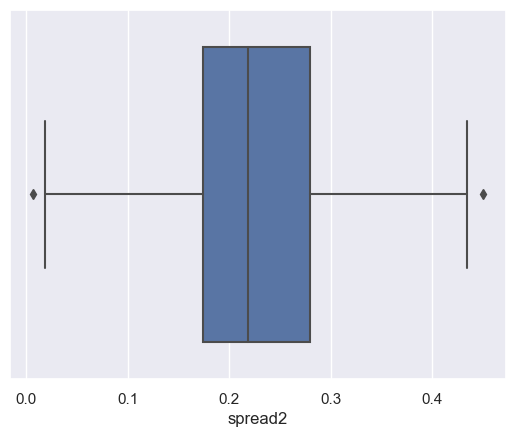

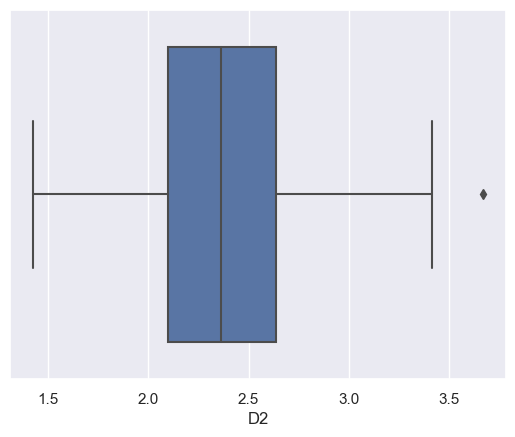

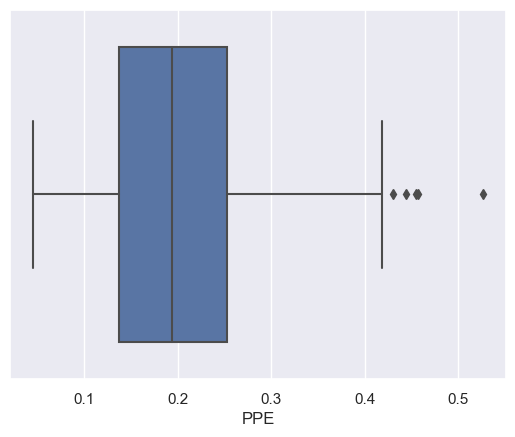

In [12]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude= ['object']))[1:]:
    boxplot(i)

In [13]:
# Advance EDA - dtale
import dtale
import dtale.app as dtale_app

In [14]:
dtale.show(df)

In [15]:
!pip install pandas-profiling

In [ ]:
# # pandas profiling
# from pandas-profiling import ProfileReport
# prof= ProfileReport(df)
# prof.to_file(output_file= 'output.html')

df.duplicated().sum()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
x= df.drop(['name', 'status'], axis=1)
y= df[['status']]

In [ ]:
x.head()
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [ ]:
y.value_counts()

status
1         147
0          48
dtype: int64

In [ ]:
# imbalance treatment
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)

In [ ]:
pd.DataFrame(y_ros).value_counts()

status
0         147
1         147
dtype: int64

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


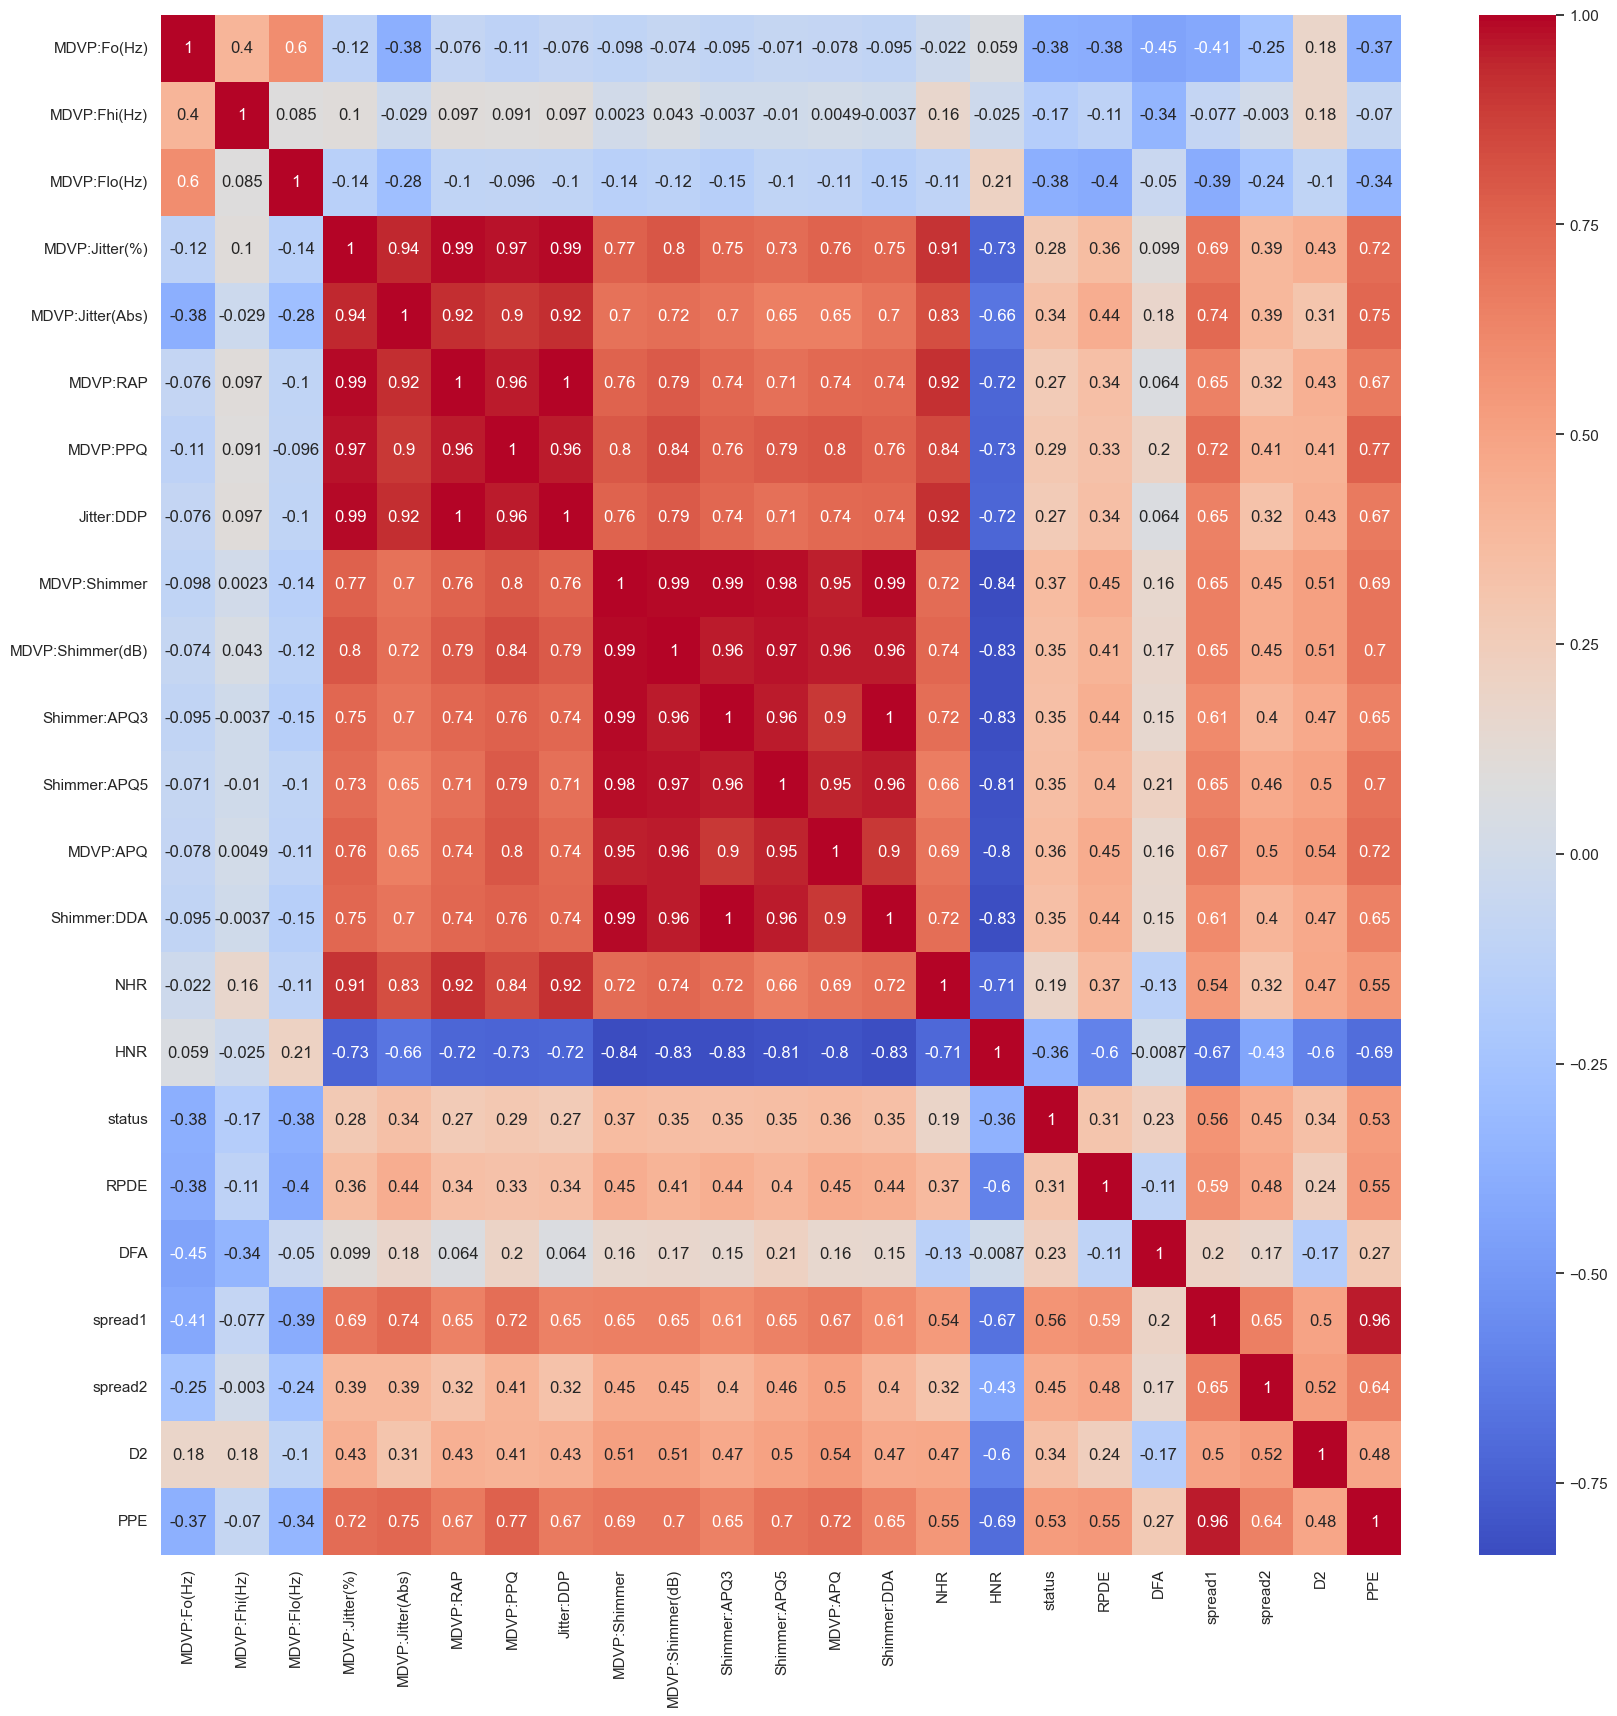

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
pd.DataFrame(x).shape

(195, 22)

In [ ]:
# Pricipal Component Analysis - DimensionReduction
from sklearn.decomposition import PCA
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(pd.DataFrame(x).shape)
print(x_pca.shape)

(195, 22)
(195, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[ 37   0]
 [  0 119]]

[[ 9  2]
 [ 1 27]]


In [ ]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156


              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.93      0.96      0.95        28

    accuracy                           0.92        39
   macro avg       0.92      0.89      0.90        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

1.0

0.9230769230769231


In [ ]:
# cross validation method
from sklearn.model_selection import cross_val_score
train_acc = cross_val_score(rf, x_train, y_train, cv=10)
test_acc = cross_val_score(rf, x_test, y_test, cv=10)


print("Train Mean Accuracy", train_acc.mean())
print("***********************************")

print("Test Mean Accuracy", test_acc.mean())

Train Mean Accuracy 0.8200000000000001
***********************************
Test Mean Accuracy 0.825


In [ ]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [ ]:
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_train) 
predictions_test = rfc.predict(x_test)
compare = pd.DataFrame({'Actuals' : y_train, 'predictions': predictions})
compare_test = pd.DataFrame({'Actuals': y_test, 'predictions': predictions_test})
accuracy = np.sum(compare['Actuals'] == compare['predictions'])/compare.shape[0]
accuracy_test = np.sum(compare_test['Actuals'] == compare_test['predictions'])/compare_test.shape[0]
print('accuracy_train : ', accuracy, 'accuracy_val : ',accuracy_test)
print ('F1 score for the train set predction', f1_score(y_true= y_train, y_pred= predictions, average='weighted'))
print ('F1 score for the  validation set predction', f1_score(y_true= y_test, y_pred= predictions_test, average='weighted'))
print(confusion_matrix(y_true = y_test, y_pred = predictions_test))
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test.shape[0], (y_test != predictions_test).sum()))